In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
data = pd.read_csv('Leukemia_GSE9476-2.csv',na_values='?')
#print(data.race.count())
print("We Have "+str(data.shape[0]) + " records and " + str(data.shape[1]) + " features" )
data.head()

We Have 64 records and 22285 features


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


#### Check name of columns

In [3]:
print("Column names",data.columns[:20])

Column names Index(['samples', 'type', '1007_s_at', '1053_at', '117_at', '121_at',
       '1255_g_at', '1294_at', '1316_at', '1320_at', '1405_i_at', '1431_at',
       '1438_at', '1487_at', '1494_f_at', '1598_g_at', '160020_at', '1729_at',
       '1773_at', '177_at'],
      dtype='object')


In [42]:
print("Colunms name",data.columns[21:40])

Colunms name Index(['1861_at', '200000_s_at', '200001_at', '200002_at', '200003_s_at',
       '200004_at', '200005_at', '200006_at', '200007_at', '200008_s_at',
       '200009_at', '200010_at', '200011_s_at', '200012_x_at', '200013_at',
       '200014_s_at', '200015_s_at', '200016_x_at', '200017_at'],
      dtype='object')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 22285 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(22283), int64(1), object(1)
memory usage: 10.9+ MB


# Missing value
### Check for Missing values

In [5]:
print("Missing Values",data.isnull().sum().sum())

Missing Values 0


# Encoding

#### Find categorical and numerical columns

In [6]:
# select float columns
data_float=data.select_dtypes(include=[np.float])
# select int columns
data_int=data.select_dtypes(include=[np.int])
# select object columns
data_object=data.select_dtypes(include=[object])

In [7]:
print("float :",data_float.columns)
print("int :",data_int.columns)
print("object :",data_object.columns)

float : Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Hs28SrRNA-5_at', 'AFFX-r2-Hs28SrRNA-M_at',
       'AFFX-r2-P1-cre-3_at', 'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at',
       'AFFX-ThrX-5_at', 'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-5_at', 'AFFX-TrpnX-M_at'],
      dtype='object', length=22283)
int : Index([], dtype='object')
object : Index(['type'], dtype='object')


### encoding with LabelEncoder

In [3]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data_label=data.apply(le.fit_transform)
data_label.shape

(64, 22285)

# Remove outlier

#### useing IQR

In [9]:
from scipy.stats import iqr
data_cl=iqr(data_label,axis=0)
data_cl.shape

(22285,)

#### useing zscore

In [10]:
from scipy import stats
data_cll=data_label[(np.abs(stats.zscore(data_label))<3).all(axis=1)]
data_cll.shape

(64, 22285)

# Scaleing

In [4]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(data_label)

In [11]:
from sklearn.preprocessing import MinMaxScaler
Scaleddata = MinMaxScaler().fit_transform(data_label)
data_label = pd.DataFrame(Scaleddata,columns=data_label.columns)

# Dimensionalty Reducation

This is a high dimensional data set with too many dimensions. we used PCA  to see if extract features

(64, 64)

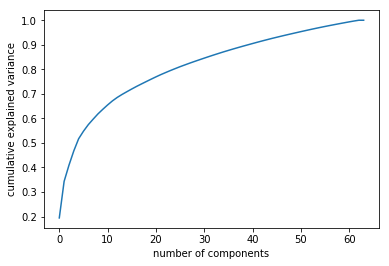

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
data_pca=pca.fit_transform(data_label)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
data_pca=pd.DataFrame(data_pca,columns=data)
data_pca.shape

# Hierarchical Clustering



In [13]:
data_s = data_pca.iloc[:,0:64].values

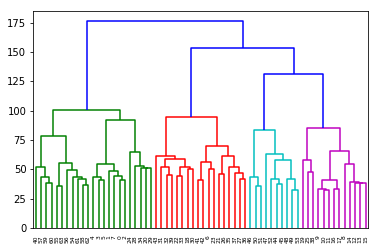

In [14]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(data_s,method="ward"))

In [15]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit_predict(data_s)

array([2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0,
       0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 4, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int64)

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

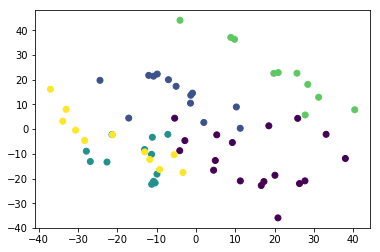

In [16]:
plt.scatter(data_s[:,0],data_s[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red");

In [45]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(data_s) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True 
labels = db.labels_ 
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
n_noise_ = list(labels).count(-1) 

print('Estimated number of clusters: %d' % n_clusters_) 
print('Estimated number of noise points: %d' % n_noise_) 

Estimated number of clusters: 0
Estimated number of noise points: 64


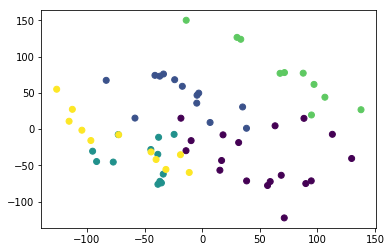

In [46]:
plt.scatter(data_s[:,0],data_s[:,1], c=model.labels_);
